
<center>

# ФБ-33 Стогнійчук Інна
## Лабораторна робота No6
## Застосування numpy

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Завдання 1

### 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

In [2]:
def generate_data(num_points, k, b, noise=2):
    x = np.linspace(0, 10, num_points)
    noise_values = np.random.normal(0, noise, num_points)
    
    y = k * x + b + noise_values
    
    return x, y


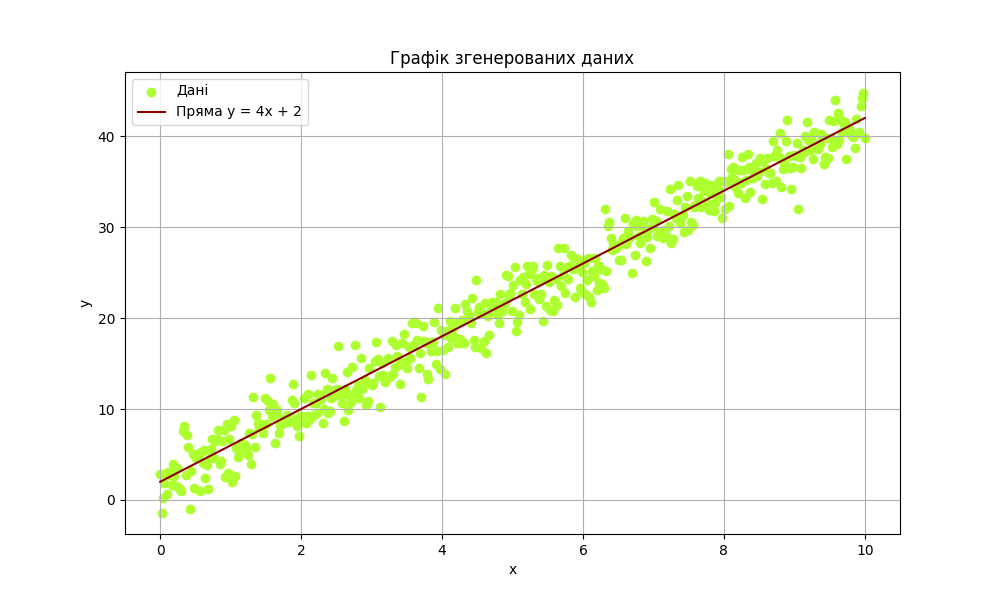

In [3]:
k = 4
b = 2
x, y = generate_data(500, k, b)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='greenyellow', label='Дані')
plt.plot(x, k * x + b, color='darkred', label=f'Пряма y = {k}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік згенерованих даних')
plt.legend()
plt.grid(True)
plt.show()

### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

\begin{align*}
\hat{k} = \frac{\sum (x_i - \hat{x}) \cdot (y_i - \hat{y})}{\sum (x_i -\hat{x})^2}
\end{align*}

\begin{align*}
\hat{b} = \hat{y} - \hat{k} \cdot \hat{x}
\end{align*}

In [4]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    a = np.sum((x - x_mean) * (y - y_mean))
    c = np.sum((x - x_mean)**2)

    k_optimal = a / c  
    b_optimal  = y_mean - k_optimal * x_mean

    return k_optimal, b_optimal

k_ls, b_ls = least_squares(x, y)

print("Оптимальна оцінка k:", k_ls)
print("Оптимальна оцінка b:", b_ls)

Оптимальна оцінка k: 4.008149369411688
Оптимальна оцінка b: 1.7931600036844166


### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [5]:
coefficients_polyfit = np.polyfit(x, y, 1)
k_polyfit, b_polyfit = coefficients_polyfit

print("Параметри прямої за методом найменших квадратів:")
print("k =", k_ls)
print("b =", b_ls)

print("Параметри прямої за np.polyfit:")
print("k =", k_polyfit)
print("b =", b_polyfit)

print("Початкові параметри прямої:")
print("k =", k)
print("b =", b)

Параметри прямої за методом найменших квадратів:
k = 4.008149369411688
b = 1.7931600036844166
Параметри прямої за np.polyfit:
k = 4.008149369411688
b = 1.7931600036844246
Початкові параметри прямої:
k = 4
b = 2


### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

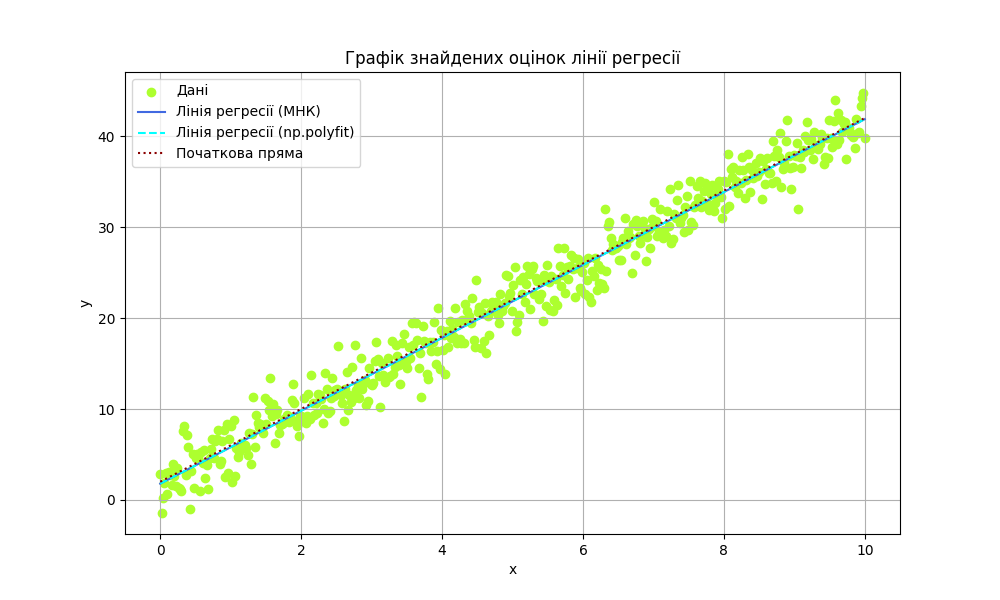

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='greenyellow', label='Дані')

# Побудова оцінки лінії регресії за методом найменших квадратів
plt.plot(x, k_ls * x + b_ls, color='royalblue', label='Лінія регресії (МНК)')

# Побудова оцінки лінії регресії за np.polyfit
plt.plot(x, k_polyfit * x + b_polyfit, color='cyan', linestyle='--', label='Лінія регресії (np.polyfit)')

# Початкова пряма 
plt.plot(x, k * x + b, color='darkred', linestyle=':', label='Початкова пряма')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік знайдених оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

## Завдання 2

### 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

\begin{align*}
\frac{\partial L}{\partial \hat{k}}  = -\frac{2}{n} \sum x_i \left( y_i - \hat{y} \right)
\end{align*}

\begin{align*}
\frac{\partial L}{\partial \hat{b}} = -\frac{2}{n} \sum \left( y_i - \hat{y} \right)
\end{align*}

In [7]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    # Початкові значення k та b
    k = 0
    b = 0
    
    n = len(x)
    
    for i in range(n_iter):
        # Обчислення похідних за k та b
        k_gradient = -(2/n) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/n) * np.sum(y - (k*x + b))
        
        # Оновлення параметрів k та b за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient
    
    return k, b
learning_rate = 0.001
n_iter = 10000

k_gd, b_gd = gradient_descent(x, y, learning_rate, n_iter)
print("Оптимальна оцінка k:", k_gd)
print("Оптимальна оцінка b:", b_gd)

Оптимальна оцінка k: 4.0094483042063525
Оптимальна оцінка b: 1.7845554622533184


### 2. Додайте отриману лінію регресії на загальний графік

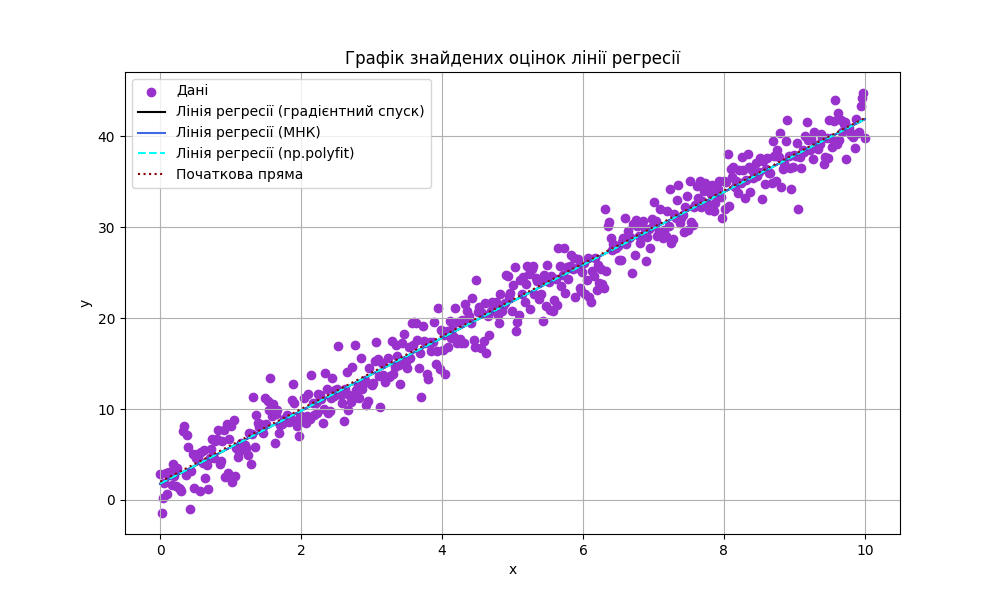

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkorchid', label='Дані')

plt.plot(x, k_gd * x + b_gd, color='black', label='Лінія регресії (градієнтний спуск)')
plt.plot(x, k_ls * x + b_ls, color='royalblue', label='Лінія регресії (МНК)')
plt.plot(x, k_polyfit * x + b_polyfit, color='cyan', linestyle='--', label='Лінія регресії (np.polyfit)')
plt.plot(x, k * x + b, color='darkred', linestyle=':', label='Початкова пряма')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік знайдених оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

### 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки


1. Середньоквадратична помилка (MSE):
\begin{align*}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
\end{align*}

2. Середня абсолютна помилка (MAE):
\begin{align*}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true},i} - y_{\text{pred},i}|
\end{align*}

3. Коефіцієнт детермінації ( R^2 ) (R-squared):
\begin{align*}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y}_{\text{true}})^2}
\end{align*}

### MSE:

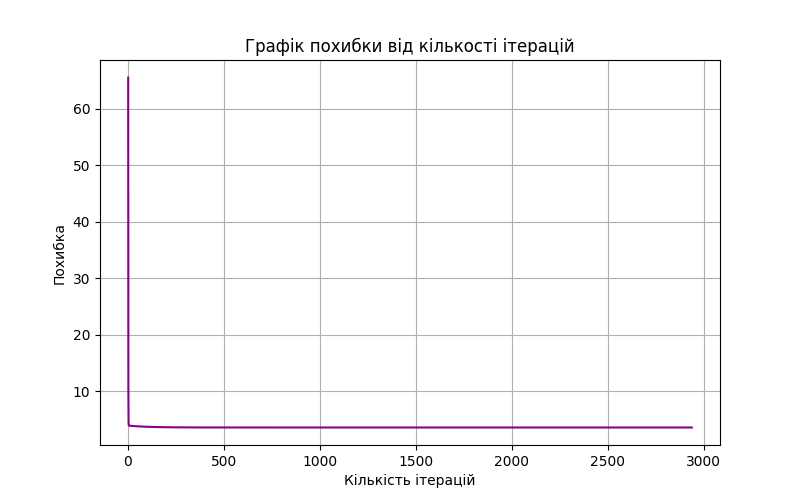

Згідно з графіком, найменша похибка: 3.556529274526556 при n_iter = 2937


In [9]:
def gradient_descent1(x, y, learning_rate=0.01, n_iter=1000):
    # Початкові значення k та b
    k = 0
    b = 0
    n = len(x)
    ob_error_ar = []
    prev_loss = float('inf')

    for i in range(n_iter):
        # Обчислення похідних за k та b
        k_gradient = -(2/n) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/n) * np.sum(y - (k*x + b))
        
        # Оновлення параметрів k та b за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

        ob_error = np.mean((y - (k*x + b))**2)
        ob_error_ar.append(ob_error)

        if ob_error == prev_loss:
            break
        prev_loss = ob_error

    return k, b, ob_error_ar

learning_rate = 0.01
n_iter = 10000

k_gd, b_gd, ob_error_ar = gradient_descent1(x, y, learning_rate, n_iter)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ob_error_ar)+1), ob_error_ar, color='darkmagenta')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')
plt.grid(True)
plt.show()

print("Згідно з графіком, найменша похибка:", ob_error_ar[-1], "при n_iter =", len(ob_error_ar))



### Для оцінки точності моделі лінійної регресії можна використовувати метрики, такі як середньоквадратична помилка (MSE), середня або медіанна абсолютна помилка (MAE), коефіцієнт детермінації R-squared

### MAE i R^2:

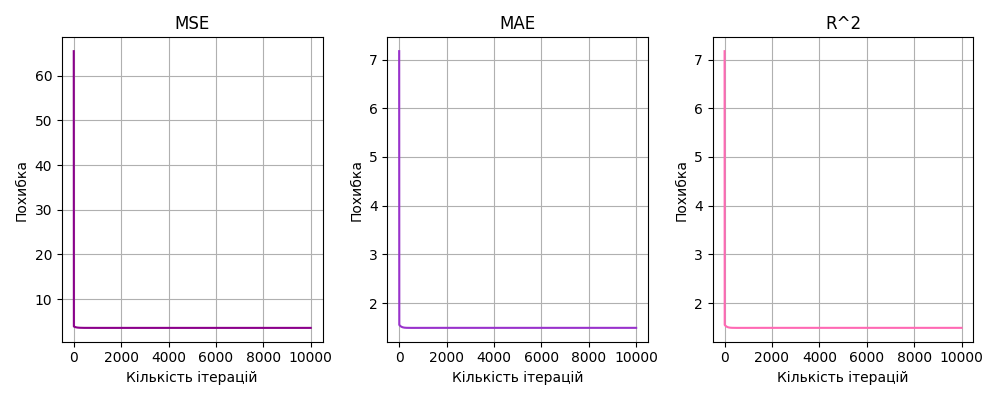

Згідно з графіком, найменша похибка MSE: 3.5565292745264583
Згідно з графіком, найменша похибка MAE: 1.4915549552668812
Згідно з графіком, найменша похибка R^2: 0.9742224989538739


In [10]:
def gradient_descent2(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    n = len(x)

    ob_error_ar = []
    mae_errors = []
    r_errors = []

    for i in range(n_iter):
        k_gradient = -(2/n) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/n) * np.sum(y - (k*x + b))
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

        ob_error = np.mean((y - (k*x + b))**2)
        ob_error_ar.append(ob_error)

        mae_error = np.mean(np.abs(y - (k*x + b)))
        mae_errors.append(mae_error)
        
        r_error = 1 - np.sum((y - (k*x + b))** 2) / np.sum((y - np.mean(y)) ** 2)
        r_errors.append(r_error)

    return k, b, ob_error_ar, mae_errors, r_errors

learning_rate = 0.01
n_iter = 10000

k_gd, b_gd, ob_error_ar, mae_errors, r_errors = gradient_descent2(x, y, learning_rate, n_iter)


plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.plot(range(1, n_iter+1), ob_error_ar, color='darkmagenta')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('MSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, n_iter+1), mae_errors, color='darkorchid')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, n_iter+1), mae_errors, color='hotpink')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('R^2')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Згідно з графіком, найменша похибка MSE:", ob_error_ar[-1])
print("Згідно з графіком, найменша похибка MAE:", mae_errors[-1])
print("Згідно з графіком, найменша похибка R^2:", r_errors[-1])

### 4. Порівняйте отримані результати з результатами попереднього завдання

#### Параметри

In [11]:
print("Початкові параметри прямої:")
print("k =", k)
print("b =", b)
print("-"*50)

print("Параметри прямої за методом найменших квадратів:")
print("k =", k_ls)
print("b =", b_ls)
print("-"*50)

print("Параметри прямої за np.polyfit:")
print("k =", k_polyfit)
print("b =", b_polyfit)
print("-"*50)

print("Параметри прямої при градієнтному спускові:")
print("k =", k_gd)
print("b =", b_gd)


Початкові параметри прямої:
k = 4
b = 2
--------------------------------------------------
Параметри прямої за методом найменших квадратів:
k = 4.008149369411688
b = 1.7931600036844166
--------------------------------------------------
Параметри прямої за np.polyfit:
k = 4.008149369411688
b = 1.7931600036844246
--------------------------------------------------
Параметри прямої при градієнтному спускові:
k = 4.008149369411693
b = 1.7931600036843935


#### Похибка


In [12]:
# МНК
y_ls = k_ls * x + b_ls
mse_ls = mean_squared_error(y, y_ls)
mae_ls = mean_absolute_error(y, y_ls)
r2_ls = r2_score(y, y_ls)

#np.polyfit
y_polyfit = k_polyfit * x + b_polyfit
mse_polyfit = mean_squared_error(y, y_polyfit)
mae_polyfit = mean_absolute_error(y, y_polyfit)
r2_polyfit = r2_score(y, y_polyfit)

#gradient descent
y_gd = k_gd * x + b_gd
mse_gd = mean_squared_error(y, y_gd)
mae_gd = mean_absolute_error(y, y_gd)
r2_gd = r2_score(y, y_gd)

print("Метод найменших квадратів (МНК):")
print("MSE =", mse_ls)
print("MAE =", mae_ls)
print("R^2 =", r2_ls)
print("-"*50)

print("np.polyfit:")
print("MSE =", mse_polyfit)
print("MAE =", mae_polyfit)
print("R^2 =", r2_polyfit)
print("-"*50)

print("Градієнтний спуск:")
print("MSE =", mse_gd)
print("MAE =", mae_gd)
print("R^2 =", r2_gd)

Метод найменших квадратів (МНК):
MSE = 3.5565292745264587
MAE = 1.4915549552668819
R^2 = 0.9742224989538739
--------------------------------------------------
np.polyfit:
MSE = 3.556529274526458
MAE = 1.4915549552668816
R^2 = 0.9742224989538739
--------------------------------------------------
Градієнтний спуск:
MSE = 3.5565292745264583
MAE = 1.4915549552668812
R^2 = 0.9742224989538739
